## Estimated Ultimate Gas Recovery Prediction Using ML


EUR, or Estimated Ultimate Recovery, is a term used in the shale gas industry to refer to the estimated total amount of natural gas that can be economically recovered from a well. It is a prediction based on a variety of factors, such as the size of the reservoir, the quality of the rock, and the expected decline rate of production over time. EUR is an important metric for evaluating the potential economic value of a shale gas well and is often used in decision making for investment and development. In a shale gas wells dataset, EUR values would typically be associated with individual wells and may be used for comparison and analysis purposes

In this project, we are going to fit a machine learning model with the features of Shale Gas well to predict the estimated ultimate recovery (EUR).

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Get the data

data  = pd.read_csv('Shale_Gas_Wells_Dataset.csv')

In [3]:
data.head()

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
0,140,38,850,0,165,8543,64,8.3,8200,17.1,38.0,0.95,3012,13.3
1,140,30,900,0,174,8336,60,7.8,8061,16.0,59.3,0.95,2771,12.5
2,140,30,900,0,174,9361,65,7.8,8061,16.0,59.3,0.95,3067,16.9
3,140,30,950,0,175,9110,69,8.3,7922,15.7,66.9,0.95,3130,16.5
4,140,30,950,0,175,9310,67,8.3,7922,15.7,66.9,0.95,2991,17.4


In [4]:
# Check missing values
data.isna().sum()

Stage Spacing        0
bbl/ft               0
Well Spacing         0
Dip                  0
Thickness            0
Lateral Length       0
Injection Rate       0
Porosity             0
ISIP                 0
Water Saturation     0
Percentage of LG     0
Pressure Gradient    0
Proppant Loading     0
EUR                  0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage Spacing      506 non-null    int64  
 1   bbl/ft             506 non-null    int64  
 2   Well Spacing       506 non-null    int64  
 3   Dip                506 non-null    int64  
 4   Thickness          506 non-null    int64  
 5   Lateral Length     506 non-null    int64  
 6   Injection Rate     506 non-null    int64  
 7   Porosity           506 non-null    float64
 8   ISIP               506 non-null    int64  
 9   Water Saturation   506 non-null    float64
 10  Percentage of LG   506 non-null    float64
 11  Pressure Gradient  506 non-null    float64
 12  Proppant Loading   506 non-null    int64  
 13  EUR                506 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 55.5 KB


In [6]:
data.shape

(506, 14)

### Descriptive Statistics

In [7]:
data.describe()

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,147.640316,35.134387,820.158103,0.069170,162.365613,8153.086957,63.079051,7.337549,7010.490119,19.213439,64.845455,0.930257,2567.065217,12.845455
std,18.392128,10.533197,135.736986,0.253994,15.471044,942.393981,7.250106,0.749451,1211.452205,3.198579,18.427813,0.046507,413.792220,3.067064
min,140.000000,30.000000,650.000000,0.000000,120.000000,4500.000000,55.000000,5.500000,5000.000000,15.000000,15.000000,0.750000,1100.000000,7.000000
25%,140.000000,30.000000,700.000000,0.000000,153.000000,7617.750000,57.000000,6.600000,5000.000000,16.800000,55.900000,0.940000,2317.500000,11.000000
50%,141.000000,30.000000,800.000000,0.000000,165.000000,8051.000000,61.000000,7.500000,7643.000000,17.700000,69.900000,0.950000,2642.000000,12.400000
75%,148.000000,36.000000,900.000000,0.000000,176.000000,8608.000000,69.000000,8.000000,7783.000000,24.100000,79.700000,0.950000,2897.750000,13.700000
max,330.000000,75.000000,1350.000000,1.000000,185.000000,11500.000000,80.000000,8.500000,8200.000000,25.000000,95.000000,0.950000,3200.000000,22.000000


### Visualize the dataset 

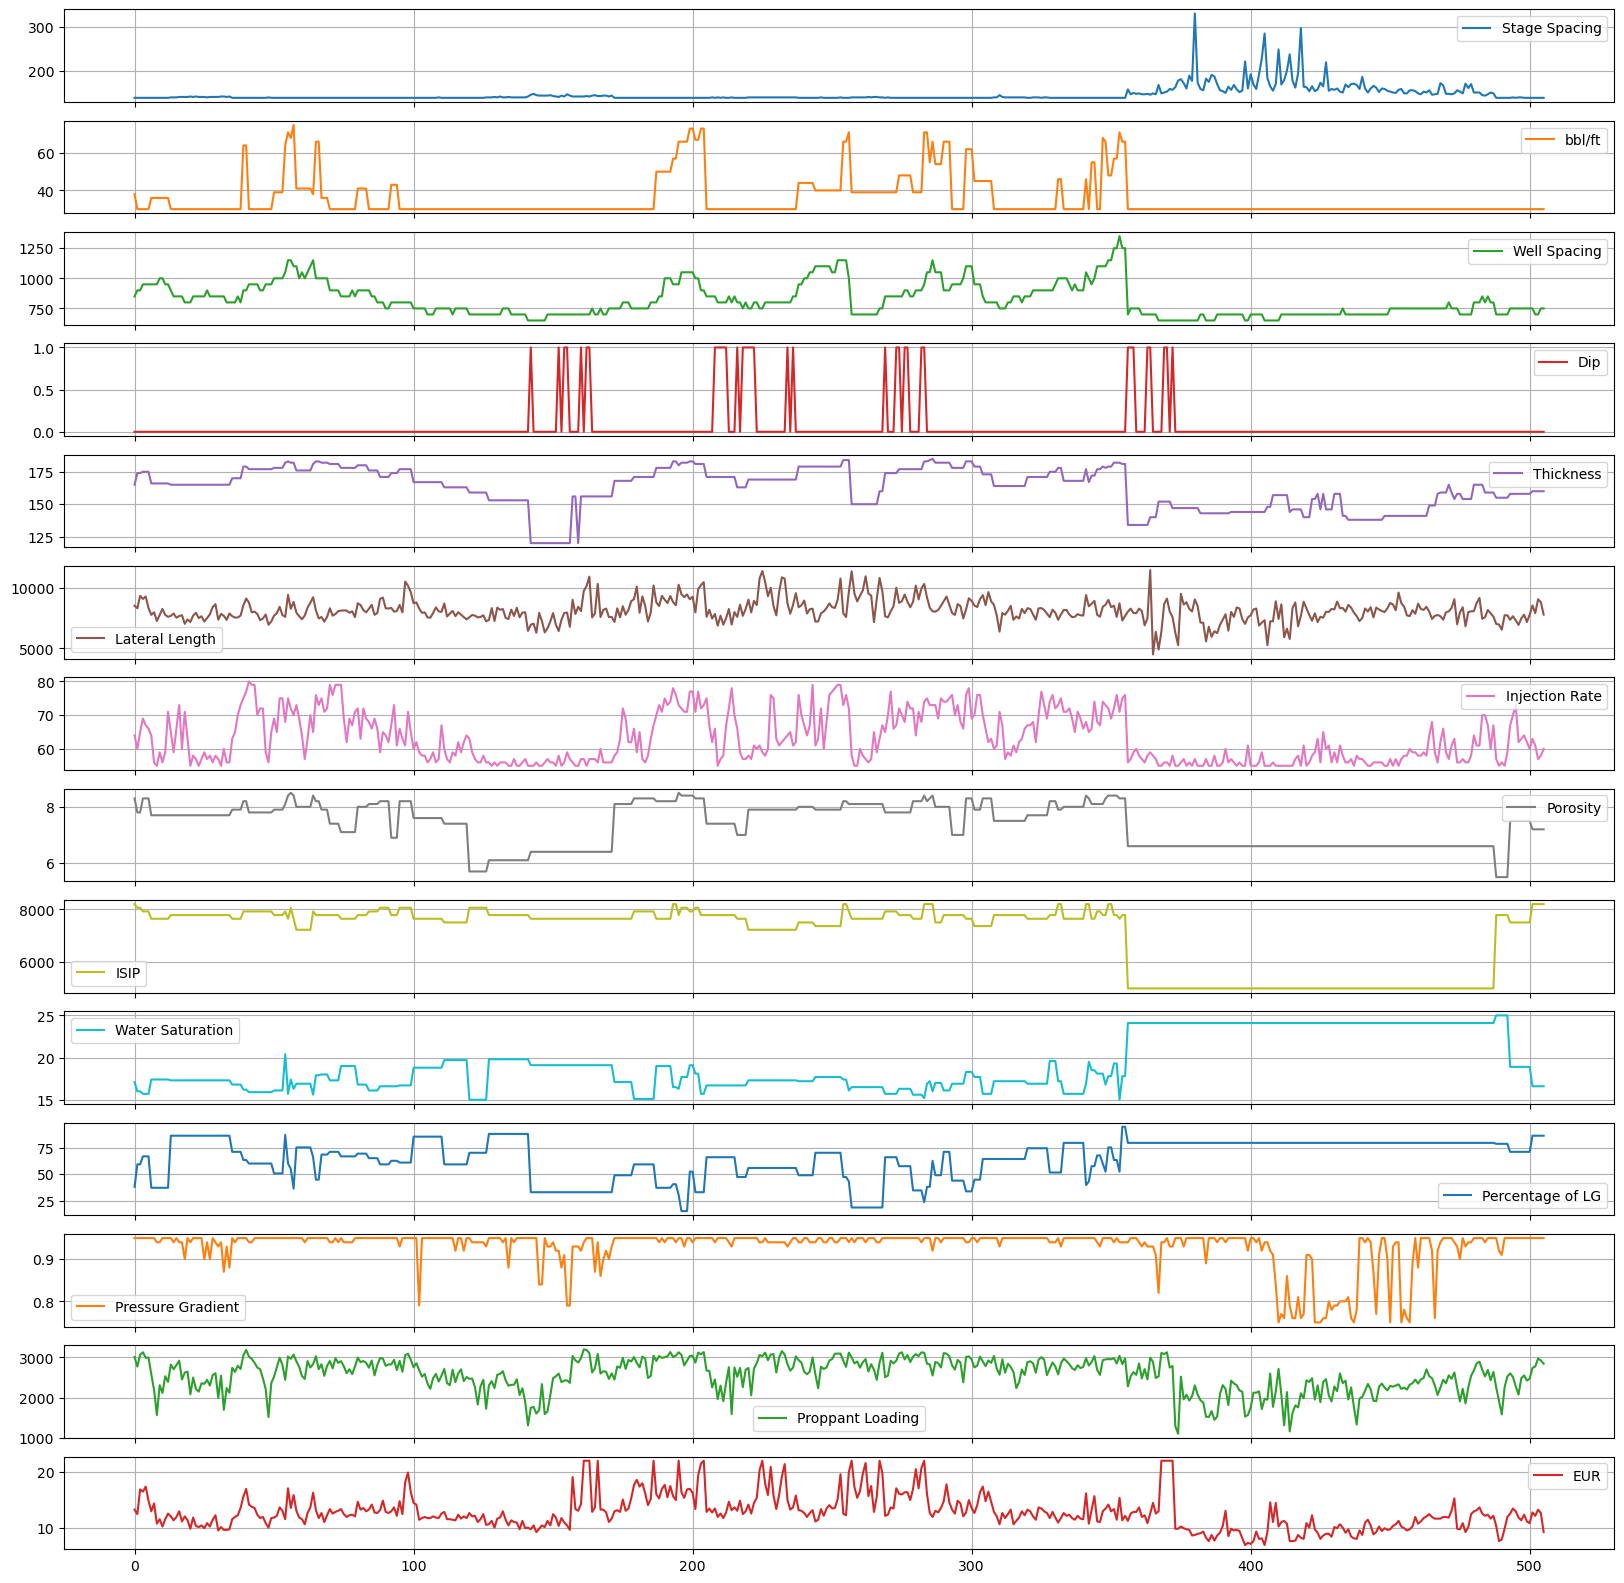

<Figure size 640x480 with 0 Axes>

In [19]:
plt.style.use('default')
data.plot(subplots=True, figsize=(20,20), grid=True)
plt.show()
plt.interactive(True)
plt.savefig('shall_gas_well.png')

## Correlation between variables

<AxesSubplot:>

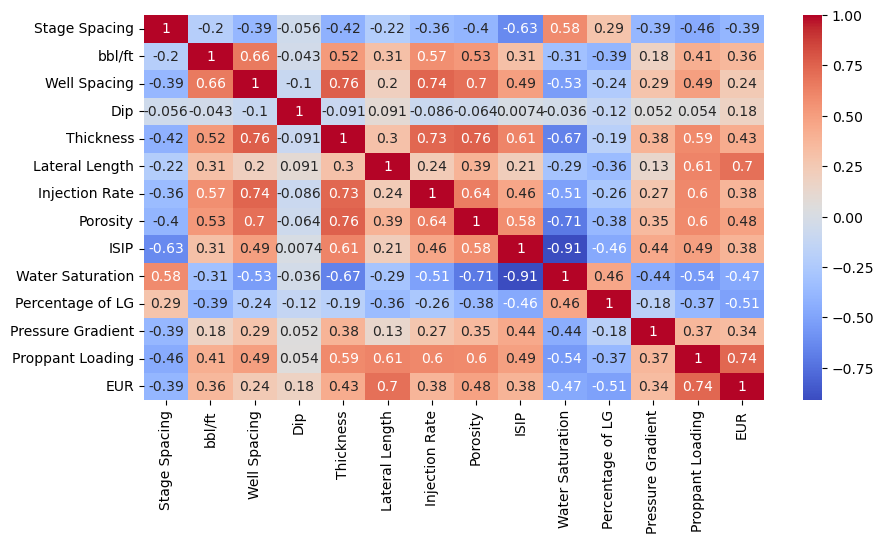

In [23]:
data_corr = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data_corr, annot=True, cmap='coolwarm')


## How does the target variable EUR correlates with the other variable

<AxesSubplot:>

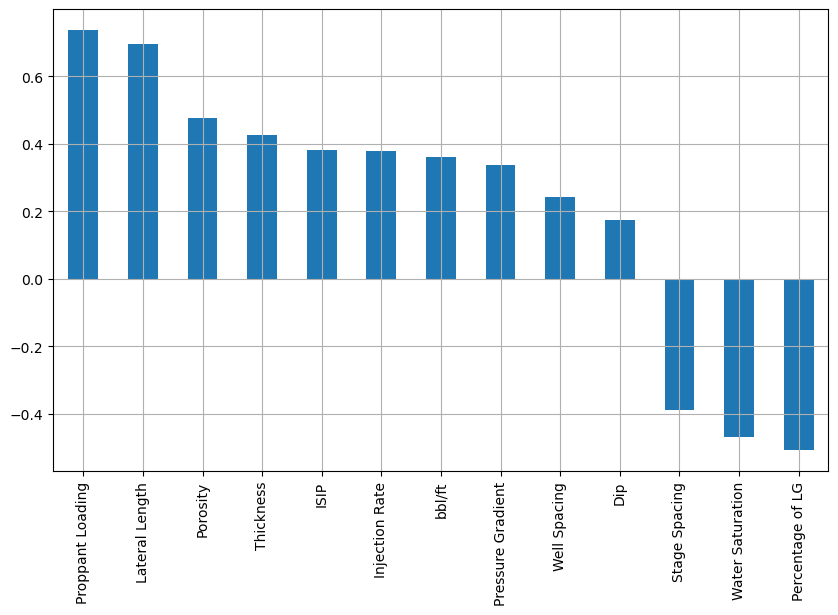

In [30]:
data_corr['EUR'][:-1].sort_values(ascending=False).plot(kind='bar', grid=True,figsize=(10,6))

In [ ]:
sns.pairplot(data)